In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### Cubic splines

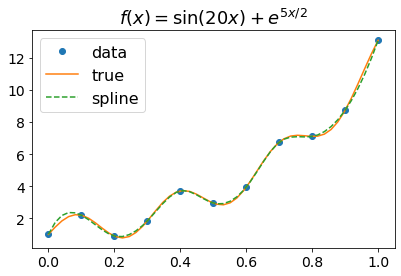

In [2]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.arange(11)/10
y = np.sin(20*x) + np.exp(5*x/2)
cs = CubicSpline(x, y)

xs  = np.linspace(0,1)
ys = np.sin(20*xs) + np.exp(5*xs/2)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, ys, label='true')
ax.plot(xs, cs(xs), '--', label="spline")
ax.set_title('$f(x) = \sin(20x) + e^{5x/2}$', fontsize = 18)
ax.legend(fontsize = 16)

### Effect of boundary conditions

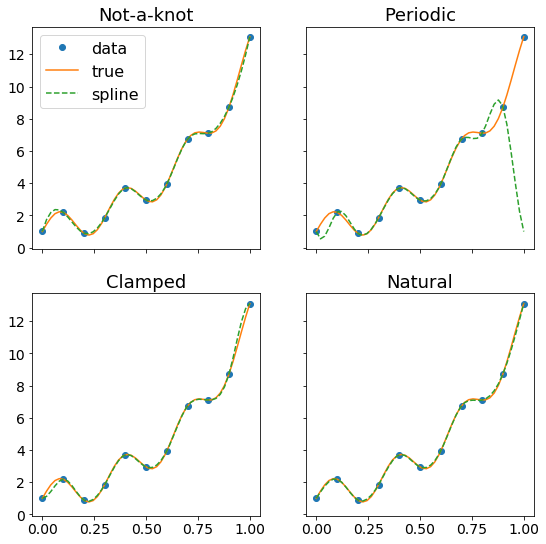

In [3]:
x = np.arange(11)/10
y = np.sin(20*x) + np.exp(5*x/2)

fig, axarray = plt.subplots(2, 2, sharex = True, sharey = True, figsize=(9, 9))
bcs = ['not-a-knot', 'periodic', 'clamped', 'natural']
disp = ['Not-a-knot', 'Periodic', 'Clamped','Natural']
for j, ax in enumerate(axarray.flatten()):
    
    if j == 1:
        ymod = np.copy(y)
        ymod[-1] = ymod[0]
    else:
        ymod = np.copy(y)
    
    cs = CubicSpline(x, ymod, bc_type = bcs[j])

    xs = np.linspace(0,1)
    ys = np.sin(20*xs) + np.exp(5*xs/2)
    
    ax.plot(x, y, 'o', label='data')
    ax.plot(xs, ys, label='true')
    ax.plot(xs, cs(xs), '--', label="spline")
    ax.set_title(disp[j], fontsize = 18)
    if j == 0:
        ax.legend(fontsize = 16)

### Complete spline:

We give the boundary conditions $s_C'(a) = f'(a)$, $s_C'(b) = f'(b)$

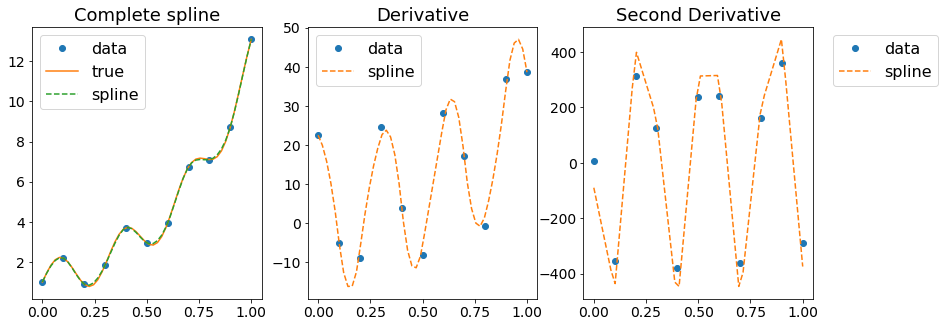

In [8]:

yp = 20*np.cos(20*x) + (5/2)*np.exp(5*x/2)
ypp = -400*np.sin(20*x) + ((5/2)**2.)*np.exp(5*x/2)

cs = CubicSpline(x, y, bc_type = ((1,yp[0]), (1,yp[-1])))


fig, (ax,axp,axpp) = plt.subplots(1,3, figsize=(14, 5))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, ys, label='true')
ax.plot(xs, cs(xs), '--', label="spline")
ax.set_title('Complete spline', fontsize = 18)
ax.legend(fontsize = 16)

axp.plot(x, yp, 'o', label='data')
axp.plot(xs, cs(xs,1), '--', label="spline")
axp.set_title('Derivative', fontsize = 18)
axp.legend(fontsize = 16)

axpp.plot(x, ypp, 'o', label='data')
axpp.plot(xs, cs(xs,2), '--', label="spline")
axpp.set_title('Second Derivative', fontsize = 18)
axpp.legend(fontsize = 16,bbox_to_anchor=(1.05, 1))

### Natural cubic splines

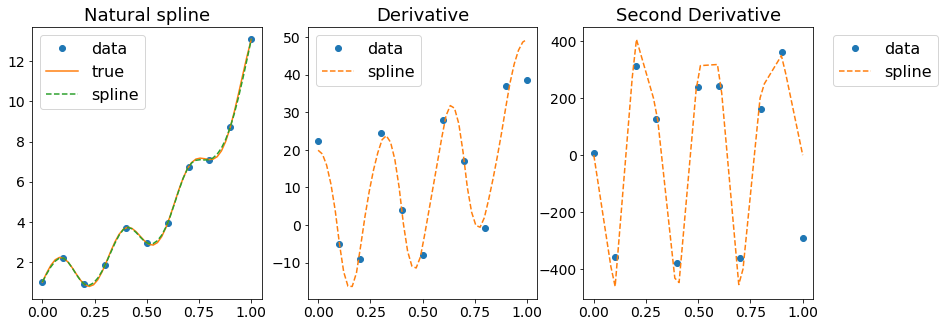

In [9]:
cs = CubicSpline(x, y, bc_type = 'natural')
fig, (ax,axp,axpp) = plt.subplots(1,3, figsize=(14, 5))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, ys, label='true')
ax.plot(xs, cs(xs), '--', label="spline")
ax.set_title('Natural spline', fontsize = 18)
ax.legend(fontsize = 16)

axp.plot(x, yp, 'o', label='data')
axp.plot(xs, cs(xs,1), '--', label="spline")
axp.set_title('Derivative', fontsize = 18)
axp.legend(fontsize = 16)


axpp.plot(x, ypp, 'o', label='data')
axpp.plot(xs, cs(xs,2), '--', label="spline")
axpp.set_title('Second Derivative', fontsize = 18)
axpp.legend(fontsize = 16, bbox_to_anchor=(1.05, 1))